In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [31]:
housing_data = pd.read_csv("california_housing_data.csv")

In [32]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [33]:
housing_data.shape

(17000, 9)

In [34]:
housing_data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [35]:
housing_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

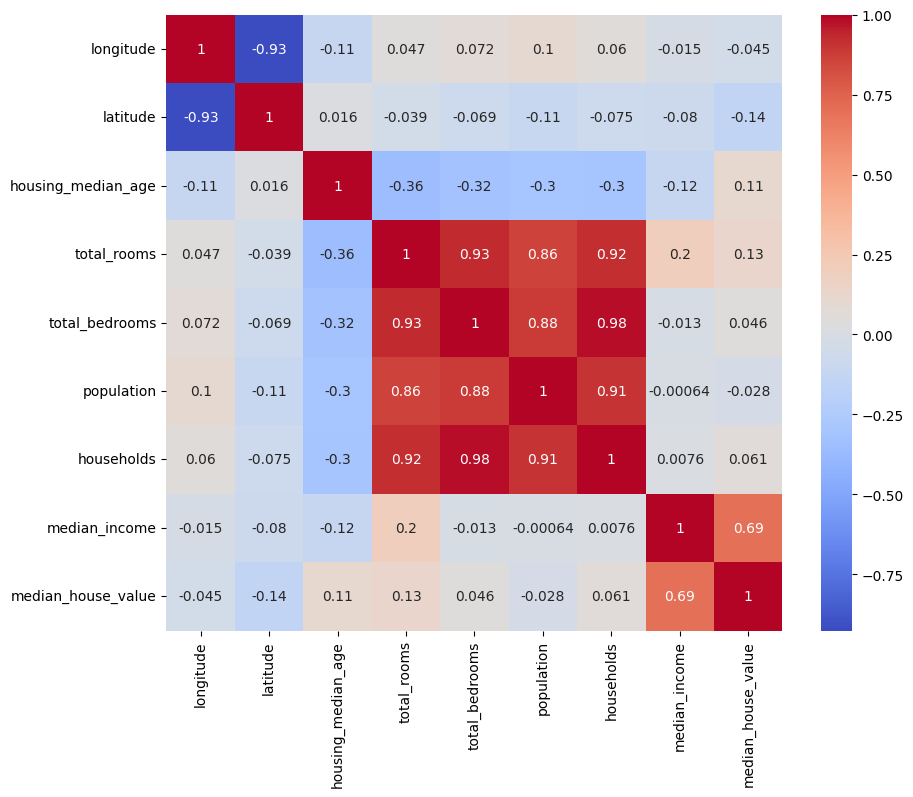

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(housing_data.corr(), annot=True, cmap="coolwarm", cbar=True, square=True)
plt.show()

In [37]:
housing_price = housing_data["median_house_value"]
housing_data.drop(columns="median_house_value", axis=1, inplace=True)

In [38]:
housing_price.shape

(17000,)

In [39]:
housing_data.shape

(17000, 8)

In [40]:
X = housing_data
Y = housing_price

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [42]:
regressor = XGBRegressor()

In [43]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
x_train_prediction = regressor.predict(X_train)
rsquare = r2_score(Y_train, x_train_prediction)
mae = mean_absolute_error(Y_train, x_train_prediction)

In [45]:
print(rsquare)
print(mae)

0.9408038893244797
19983.934203559027


In [46]:
x_test_prediction = regressor.predict(X_test)
rsquare_test = r2_score(x_test_prediction, Y_test)
mae_test = mean_absolute_error(x_test_prediction, Y_test)

In [47]:
print(rsquare_test)
print(mae_test)

0.8107775889239353
31478.98295726103


In [48]:
temp_data = pd.read_csv("california_housing_data.csv")